In [1]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
import mygene
from matplotlib import pyplot as plt
from tableanalyzer import *

In [2]:
mg = mygene.MyGeneInfo()

In [3]:
mg.getgene("ENSG00000198938", 'name,symbol,refseq.rna,type_of_gene,exac.bp')

{u'_id': u'4514',
 u'_score': 11.708687,
 u'name': u'cytochrome c oxidase III',
 u'symbol': u'COX3',
 u'type_of_gene': u'protein-coding'}

In [4]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
dirs = os.listdir("data")

In [5]:
len(dirs)

8935

In [6]:
df = pd.read_csv(("%s/mainTable.csv"%working_dir))
genes = np.array([gene[:15] for gene in df.loc[:,'gene'].values])
df['gene'] = genes
df = df.to_sparse(fill_value=0.)
df.head()

,gene,85593c7d-7441-4d41-81d3-aaa17c7e398b.F,bfeaa9f7-e413-40b8-86ba-c9d26a96c240.F,426b94fe-fcff-49f2-9d0b-c7cb49bb5559.F,38083e21-7761-47c7-9112-769c7f85e283.F,6e2570b0-fc95-4ba9-a8a5-b79f6dea0246.F,21800024-cf76-4185-b57b-526539ccdba2.F,1f0f7598-d8c0-41ba-8b07-c958fecbb5f7.F,ea50d2da-4f84-46dc-8036-c34392793aed.F,7b2c7499-15c0-4926-a12c-4561df34954b.F,...,bd556315-a050-465f-9a41-bdebe7e3eb61.F,fde7c419-b8c0-4e04-8512-0e3b8eadebda.F,46551ef6-d1de-43c3-8ea5-5ade8a5bffd7.F,1a587b92-0a11-47f0-83c2-77a2b6de1088.F,171f664b-3226-4944-9219-91d2a7fdfb5f.F,9c77be54-d58e-4dec-8894-acb71a12cac5.F,2556ce90-db5f-4beb-897a-db3cf556e054.F,234724ab-6f82-4ac9-9948-37ffd9c3e418.F,cd550979-69b5-43d0-9724-cc25eb502cb8.F,03872f69-93f5-4d6c-aeb3-dadbc2762682.F
0,ENSG00000242268,0.076913,0.000000,0.137506,0.841950,0.522683,0.436242,0.062384,0.902013,0.000000,...,0.000000,0.046059,0.027827,0.000000,0.975612,0.000000,0.000000,0.000000,0.000000,0.000000
1,ENSG00000270112,0.007115,0.000000,0.010902,0.025961,0.616454,0.207531,0.025968,0.060075,1.020406,...,0.000000,0.019172,0.003861,0.031637,0.118014,0.000000,0.016449,0.000000,0.003548,0.000000
2,ENSG00000167578,6.736458,3.268259,0.804157,4.580433,3.330552,3.467188,1.923817,4.086256,2.477979,...,1.933432,4.589182,2.509192,1.182190,4.894803,3.463509,3.816159,2.281180,2.112157,11.051738
3,ENSG00000273842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237,4.449834,3.115587,1.536337,3.729699,3.989718,6.747617,3.787525,4.364158,4.201916,...,4.181816,15.874804,2.699238,6.278986,3.378318,6.234426,5.366732,2.985039,4.456480,3.583194


In [7]:
df.info()

<class 'pandas.core.sparse.frame.SparseDataFrame'>
RangeIndex: 60483 entries, 0 to 60482
Columns: 5001 entries, gene to 03872f69-93f5-4d6c-aeb3-dadbc2762682.F
dtypes: float64(5000), object(1)
memory usage: 1.2+ GB


In [8]:
ngenes = len(df['gene'])
nfiles = len(df.loc[0,:])-1
print("genes:%d\trealizations:%d"%(ngenes,nfiles))

genes:60483	realizations:5000


## Means sigmas

In [9]:
df_mv = pd.read_csv("meanVariances.csv", index_col = [0])
df_mv.head()

,mean,type_of_gene,variance
gene,,,
ENSG00000242268.2,0.614475,ncRNA,0.894804
ENSG00000270112.3,0.345251,unknown,0.160901
ENSG00000167578.15,3.861120,protein-coding,6.344060
ENSG00000273842.1,0.436278,unknown,0.193080
ENSG00000078237.5,4.459130,protein-coding,17.956900


In [10]:
means = df_mv['mean'].values
variances = df_mv['variance'].values
len(means)

57792

### plot

In [ ]:
fig=plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.subplot(122)
plt.scatter(means, variances)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e12))
plt.show()

In [ ]:
fig.savefig("varmean.png")

### Distributions

In [ ]:
len(means)

In [ ]:
len(variances)

In [ ]:
fig = plt.figure()
n, c, _ = plt.hist(means, density = False, histtype='step')
plt.title("means")
plt.xlabel("$<FPKM>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("mean_distr.pdf")

In [ ]:
fig = plt.figure()
n, c, _ = plt.hist(variances, density = False, histtype='step')
plt.title("vars")
plt.xlabel("$<\sigma_{FPKM}^2>$")
plt.ylabel("#")
plt.yscale('log')
plt.show()
fig.savefig("var_distr.pdf")

# protein coding genes

In [11]:
protein_coding = pd.read_csv("genes.txt", header=[0], index_col=[0])
protein_coding.loc[protein_coding['type_of_gene']=='protein-coding'].index.values

array(['ENSG00000167578', 'ENSG00000078237', 'ENSG00000146083', ...,
       'ENSG00000105063', 'ENSG00000123685', 'ENSG00000181518'],
      dtype=object)

# expression plot

In [ ]:
sample = 10
fig = plt.figure()
x = np.linspace(0, 60000)
key = df.keys()[sample]
plt.plot(df[key].to_dense(), 'o', label=key[:-2])
plt.plot(x, [100 for _ in x], 'r--', lw=4, label='threshold (100)')
plt.xlabel("gene", fontsize=16)
plt.ylabel("FPKM", fontsize=16)
plt.legend()
plt.show()

In [ ]:
fig.savefig("singleFile.pdf")

# single gene

[[0.13750555]
 [0.84195   ]
 [0.52268332]
 ...
 [0.75448271]
 [0.13762304]
 [0.97561196]]
name: ENSG00000242268
FPKM mean:       0.61
FPKM var:       0.89


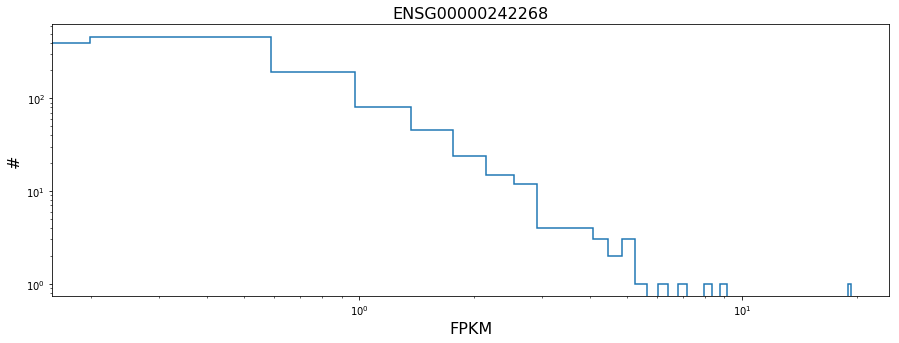

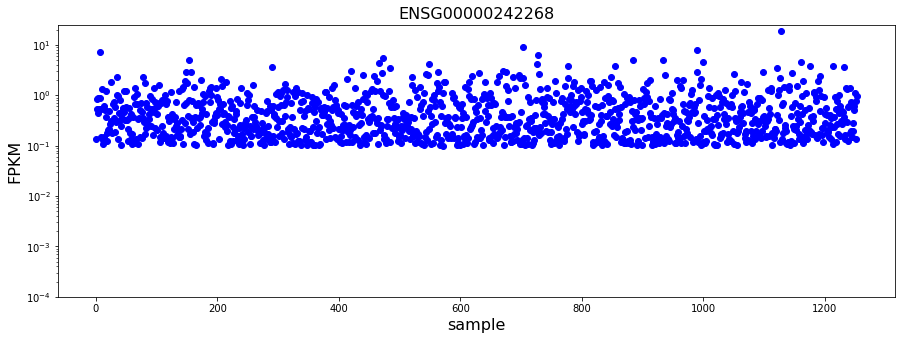

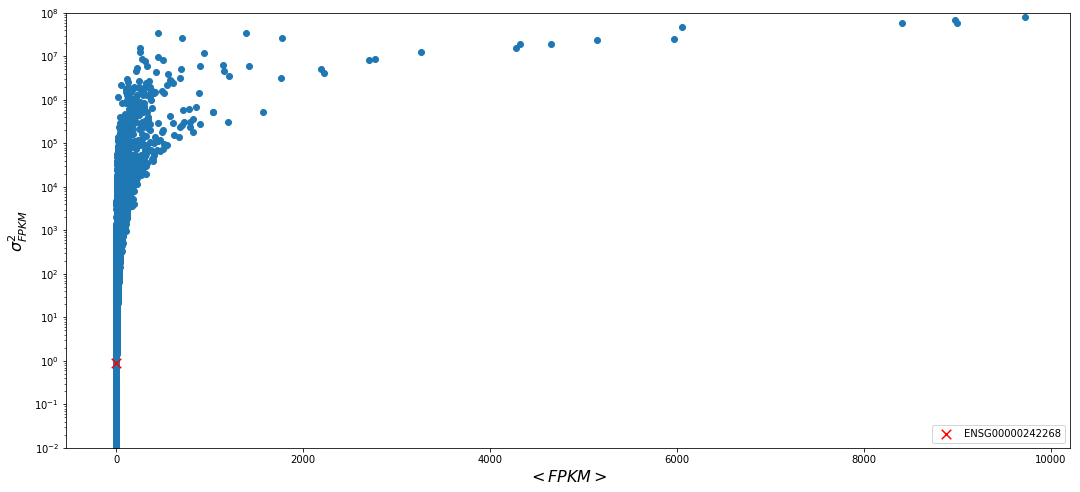

In [20]:
gene = geneinfo('ENSG00000242268', df, nfiles)
genedistr(gene, 50);
geneplot(gene);
genecoord(gene, means, variances);

# subset analysis

#### query genes

In [21]:
search_mean_max = 150
search_mean_min = 10
search_var_max = 1e12
search_var_min = 1e5
pc = True
if (pc):
    query_result = df_mv.loc[(df_mv['type_of_gene']=='protein-coding')&((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
else:
    query_result = df_mv.loc[((df_mv['mean']>(search_mean_min)) & (df_mv['mean']<(search_mean_max))) & ((df_mv['variance']>(search_var_min)) & (df_mv['variance']<(search_var_max)))].sort_values(by='mean')
query_result

,mean,type_of_gene,variance
gene,,,
ENSG00000163736.3,17.2067,protein-coding,138549.0
ENSG00000170890.12,24.1080,protein-coding,120560.0
ENSG00000143632.13,25.9814,protein-coding,235937.0
ENSG00000104371.4,29.5110,protein-coding,112918.0
ENSG00000197561.5,30.9270,protein-coding,111908.0
ENSG00000158516.10,32.2731,protein-coding,122088.0
ENSG00000081051.6,33.4354,protein-coding,102169.0
ENSG00000170323.7,37.8025,protein-coding,221219.0
ENSG00000110680.11,39.7933,protein-coding,166850.0


In [22]:
genesnames = []
for g in query_result.index.values[:5]:
    gene = geneinfo(g[:15], df, nfiles)
    genesnames.append(gene)

[[0.86558625]
 [0.15605025]
 [2.22784048]
 ...
 [1.98114753]
 [6.06254343]
 [3.17011883]]
name: ENSG00000163736
FPKM mean:      17.21
FPKM var:  138493.83
[[1.0841775 ]
 [1.31162927]
 [0.10410737]
 ...
 [0.15266271]
 [0.26385358]
 [0.32728772]]
name: ENSG00000170890
FPKM mean:      24.11
FPKM var:  120518.34


KeyboardInterrupt: 

In [23]:
genesnames

[{'avg': 17.20668007055664, 'data': array([[0.86558625],
         [0.15605025],
         [2.22784048],
         ...,
         [1.98114753],
         [6.06254343],
         [3.17011883]]), 'name': 'ENSG00000163736', 'type': 'unknown', 'var': 138493.83183372018},
 {'avg': 24.108028563321078, 'data': array([[1.0841775 ],
         [1.31162927],
         [0.10410737],
         ...,
         [0.15266271],
         [0.26385358],
         [0.32728772]]), 'name': 'ENSG00000170890', 'type': 'unknown', 'var': 120518.33784666425}]

### plot coordinates

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.subplot(121)
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
#plt.xlim(1e-2,200)
plt.ylim((1e-2,1e12))
#plt.ylim((1e-2,1e12))
plt.legend()
plt.subplot(122)
plt.scatter(means, variances)
for g in genesnames:
    plt.scatter([g['avg']],[g['var']], marker='x', s=90, label=g['name'])
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale('log')
#plt.xlim(1e-2,200)
#plt.ylim((1e-5,1e8))
plt.ylim((1e-5,1e12))
plt.legend()
plt.show()
fig.savefig("plot/genes/subset.png")

### plot all

ENSG00000163736


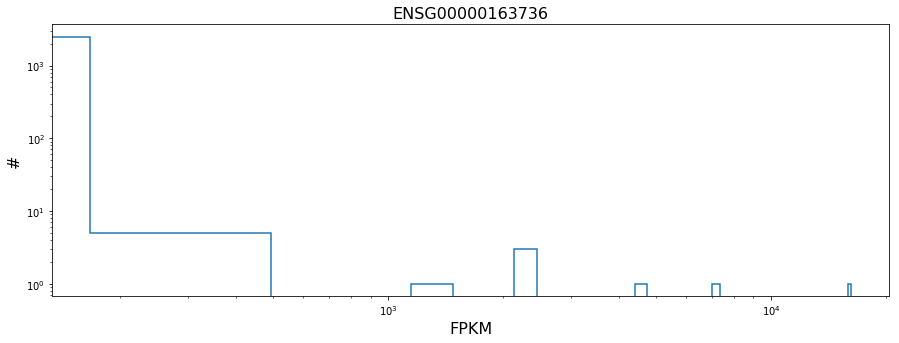

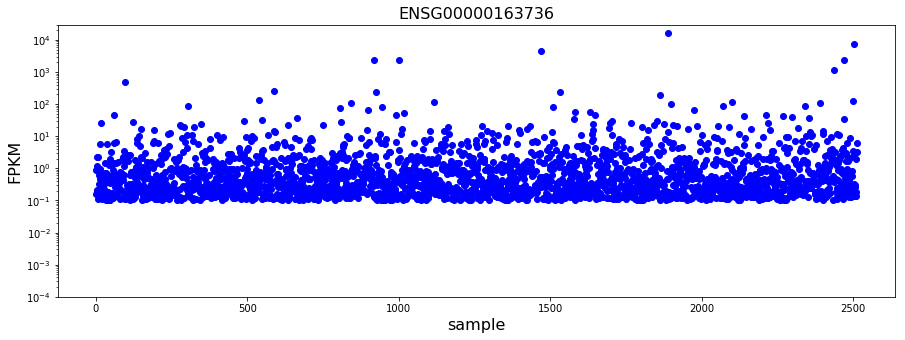

ENSG00000170890


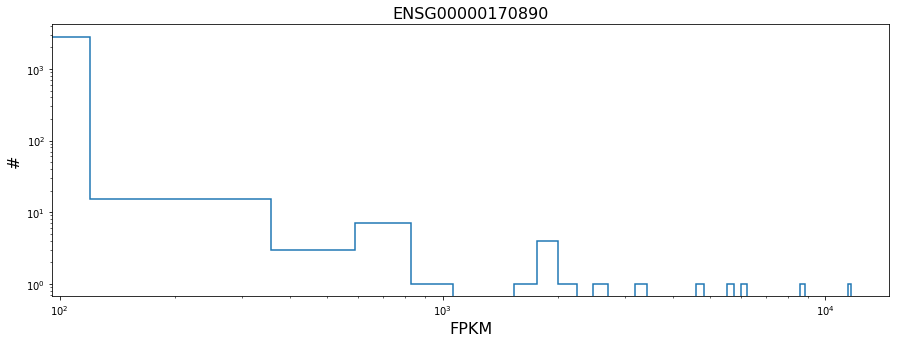

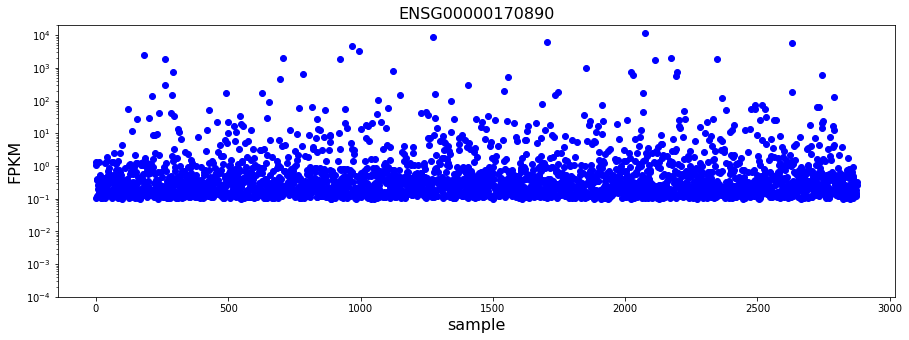

In [24]:
for gene in genesnames:
    print(gene['name'])
    genedistr(gene);
    geneplot(gene);
    #genecoord(gene);

## Plot by class

In [ ]:
types_of_gene = np.unique(df_mv['type_of_gene'].values)
types_of_gene

In [ ]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(10,10))
#['ncRNA', 'rRNA', 'scRNA', 'snRNA', 'snoRNA']
for type_of_gene in types_of_gene[:-1]:
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    plt.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1)
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.yscale(yscale)
plt.xscale(xscale)
plt.ylim(1e-7, 1e8)
plt.xlim(5e-2, 1.5e4)
plt.legend()
plt.show()
fig.savefig('allgenes_classes_known_'+yscale+xscale+'.png')

In [ ]:
xscale='log'
yscale='log'
fig = plt.figure(figsize=(30,15))
pindex = 1
for type_of_gene in types_of_gene:
    ax = plt.subplot(2,4,pindex)
    subdf = df_mv[df_mv['type_of_gene']==type_of_gene]
    ax.scatter(subdf['mean'], subdf['variance'], label = type_of_gene, marker='o', alpha=0.7, linewidths=0.1, c='C'+str(pindex))
    ax.set_title(type_of_gene)
    plt.xlabel("$<FPKM>$", fontsize=14)
    plt.ylabel("$\sigma^2_{FPKM}$", fontsize=14)
    plt.yscale(yscale)
    plt.xscale(xscale)
    plt.ylim(1e-7, 1e9)
    plt.xlim(5e-2, 2e4)
    pindex+=1
plt.show()
fig.savefig('allgenes_perclasses_'+yscale+xscale+'.png')

# null

In [ ]:
df_null = pd.read_csv(("%s/nullTable.csv"%working_dir))

In [ ]:
df_null.head()

In [ ]:
#gene = 456
genename = 'ENSG00000078237'
#genename = df['gene'][gene]
generow = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
maxfpkm = np.max(generow)
bins = 15
width = maxfpkm / bins
_range = (0 - 0.5 * width, maxfpkm + 0.5 * width)
genedata = df_null.loc[df_null['gene']==genename].loc[:,df_null.keys()[1:]].values.reshape(nfiles,1)
print("name: %s"%genename)
try:
    q = mg.getgenes(genename[:15], 'name,symbol,refseq.rna,type_of_gene')[0]
    print("Descr: %s"%q['name'])
    print("Symbol: %s"%q['symbol'])
except:
    pass
print("FPKM mean: %10.2f"%np.average(genedata))
print("FPKM sigma: %10.2f"%np.std(genedata))
print("FPKM var: %10.2f"%np.var(genedata))

In [ ]:
means_null = [np.average(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]
variances_null = [np.var(df_null.loc[i,df_null.keys()[1:]].values) for i,g in enumerate(df_null.loc[:,df_null.keys()[0]].values)]

In [ ]:
fig=plt.figure()
plt.scatter(means, variances, label='data')
plt.scatter(means_null, sigmas_null, label='null')
plt.xlabel("$<FPKM>$", fontsize=16)
plt.ylabel("$\sigma^2_{FPKM}$", fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [ ]:
fig.savefig("varmean_null.pdf")

## data size Heaps check

In [ ]:
col = df.loc[:,df.keys()[1]].values
np.sum(col)

In [ ]:
len(col[col.nonzero()])

In [ ]:
x = []
y = []
for i in range(1, 1000):
    col = df.loc[:,df.keys()[i]].values
    x.append(np.sum(col))
    y.append(len(col[col.nonzero()]))
plt.scatter(x,y)